### Data Exploration - Ranks and Streams

In this notebook, we will explore the data and try to find some interesting insights about ranks and number of unique songs and daily streams. You can use the functions below to analyze different countries and time periods.
* `plot_nunique_songs_by_rank(df, country, year)`: Plots the number of unique songs for each rank in a given country and year.
* `plot_streams_per_rank(df, country, year)`: Plots the number of streams for each rank in a given country and year.
* `plot_streams_per_rank_all_years(df, country)`: Plots the number of streams for each rank in a given country for all years.
* `plot_nunique_songs_by_rank_for_all_years(df, country)`: Plots the number of unique songs for each rank in a given country for all years.	






In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import argparse
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib import font_manager

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 150})
pd.options.mode.chained_assignment = None

In [3]:
# Change the font path and run this cell to use Roboto Condensed if it is not already configured on your system
FONT_PATH = "C:\\Users\\karab\\Desktop\\Data Literacy Repository\\env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\RobotoCondensed"

font = font_manager.FontEntry(fname=FONT_PATH, name="Roboto Condensed")
font_manager.fontManager.ttflist.append(font)

In [4]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

font_manager.findfont("Roboto Condensed") 

'C:\\Users\\karab\\Desktop\\Data Literacy Repository\\env\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\RobotoCondensed.ttf'

In [5]:

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 150})
pd.options.mode.chained_assignment = None

In [6]:
# Change the path if necessary
CHARTS_PATH = "../data/charts_processed.csv"
FEATURE_PATH = "../data/audio_features_processed.csv"

In [7]:
df = pd.read_csv(CHARTS_PATH)

In [8]:
def retrieve_yearly_data(df, year):
    """
    Retrieve the data for a given year
    """
    return df.loc[df['year'] == year]

def retrieve_monthly_data(df, year, month):
    """
    Retrieve the data for a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month)]

def retrieve_daily_data(df, year, month, day):
    """
    Retrieve the data for a given day of a given month of a given year
    """
    return df.loc[(df['year'] == year) & (df['month'] == month) & (df['day'] == day)]

In [19]:
# get total number of streams for each year
def get_total_streams(df):
    """
    Get the total number of streams for each year
    """
    df.loc[:, 'year'] = pd.DatetimeIndex(df['date']).year
    df.loc[:, 'month'] = pd.DatetimeIndex(df['date']).month
    df.loc[:, 'day'] = pd.DatetimeIndex(df['date']).day
    return df.groupby("year")["streams"].sum()


def plot_total_streams(df):
    """
    Plot the total number of streams for each year
    """
    a = get_total_streams(df)
    plt.figure(figsize=(10, 5))
    plt.plot(a.index.tolist(), a.values.tolist(), color=rgb("tuebrightblue"))
    plt.title("Total Streams per Year")
    plt.xlabel("Year")
    plt.ylabel("Total Streams")
    plt.show()

plot_total_streams(df)

TypeError: 'module' object is not callable

<Figure size 1500x750 with 0 Axes>

In [29]:
"""
Composite functions:
The idea is to make it easier for the user to retrieve the data user wants
based on country and year.
"""

def plot_streams_per_rank(df, country, year):
    """
    Plot the average number of daily streams per rank for a given year
    """
    df_country = df.loc[df['region'] == country]
    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    
    df_country = df_country.loc[df_country['year'] == year]
    streams_per_rank = df_country.groupby(['rank'])['streams'].mean()
    x = streams_per_rank.index
    y = streams_per_rank.values

    # get standard deviations for each rank
    std = df_country.groupby(['rank'])['streams'].std()
    std = std.values
    
    # create formatter
    def thousands(x, _):
        return '%1.fK' % (x * 1e-3)
    
    formatter = plt.FuncFormatter(thousands)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    # ms: width of the dots
    # lw: width of the line
    ax.plot(x, y, '.-', ms=2, lw=0.85, color=rgb.tue_darkgreen, label="average number of daily streams")
    plt.fill_between(x, y-std, y+std, alpha=0.9, color=rgb.mps_gray, label="± standard deviation")
    ax.set_xlabel("ranking")
    ax.set_ylabel("streams")
    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
    ax.yaxis.set_major_formatter(formatter)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Average number of daily streams per rank in " + country + " in " + str(year))
    plt.show()

def plot_streams_per_rank_all_years(df, country):
    # do the same thing for 2017, 2018, 2019, 2020, 2021 and plot them all in one figure
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    # create formatter
    def thousands(x, _):
        return '%1.fK' % (x * 1e-3)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    for year in range(2017, 2022):
        df_year = df_country.loc[df_country['year'] == year]
        streams_per_rank = df_year.groupby(['rank'])['streams'].mean()
        x = streams_per_rank.index
        y = streams_per_rank.values
        ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("streams")
    ax.legend(loc="upper right")
    formatter = plt.FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(formatter)

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)

    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Average number of daily streams per rank in " + country + " in 2017-2021")
    plt.show()

In [30]:
# get the The number of unique songs observed in the data at each position in the Top 200 throughout the year
def plot_nunique_songs_by_rank(df, country, year):
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    
    df_country = df_country.loc[(df_country['year'] == year) & (df_country['chart'] == "top200")]
    nunique_songs = df_country.groupby(['rank'])['title'].nunique()
    
    x = nunique_songs.index
    y = nunique_songs.values
    ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("number of unique songs")
    ax.legend(loc="upper left")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
    
    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Number of unique songs observed in the data at each position in the Top 200 in " + country + " in " + str(year))
    plt.show()
    
def plot_nunique_songs_by_rank_for_all_years(df, country):
    df_country = df.loc[df['region'] == country]

    df_country.loc[:, 'year'] = pd.DatetimeIndex(df_country['date']).year
    df_country.loc[:, 'month'] = pd.DatetimeIndex(df_country['date']).month
    df_country.loc[:, 'day'] = pd.DatetimeIndex(df_country['date']).day
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    
    for year in range(2017, 2022):
        df_year = df_country.loc[df_country['year'] == year]
        df_year = df_year.loc[df_year['chart'] == "top200"]
        nunique_songs = df_year.groupby(['rank'])['title'].nunique()
        
        x = nunique_songs.index
        y = nunique_songs.values
        ax.plot(x, y, '.-', ms=2, lw=0.85, label=year)
    ax.set_xlabel("ranking")
    ax.set_ylabel("number of unique songs")
    ax.legend(loc="upper left")

    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax.set_xlim([-2, 201])
    
    ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.2)
    ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.3)
    plt.title("Number of unique songs observed in the data at each position in the Top 200 in " + country + " in 2017-2021")
    plt.show()

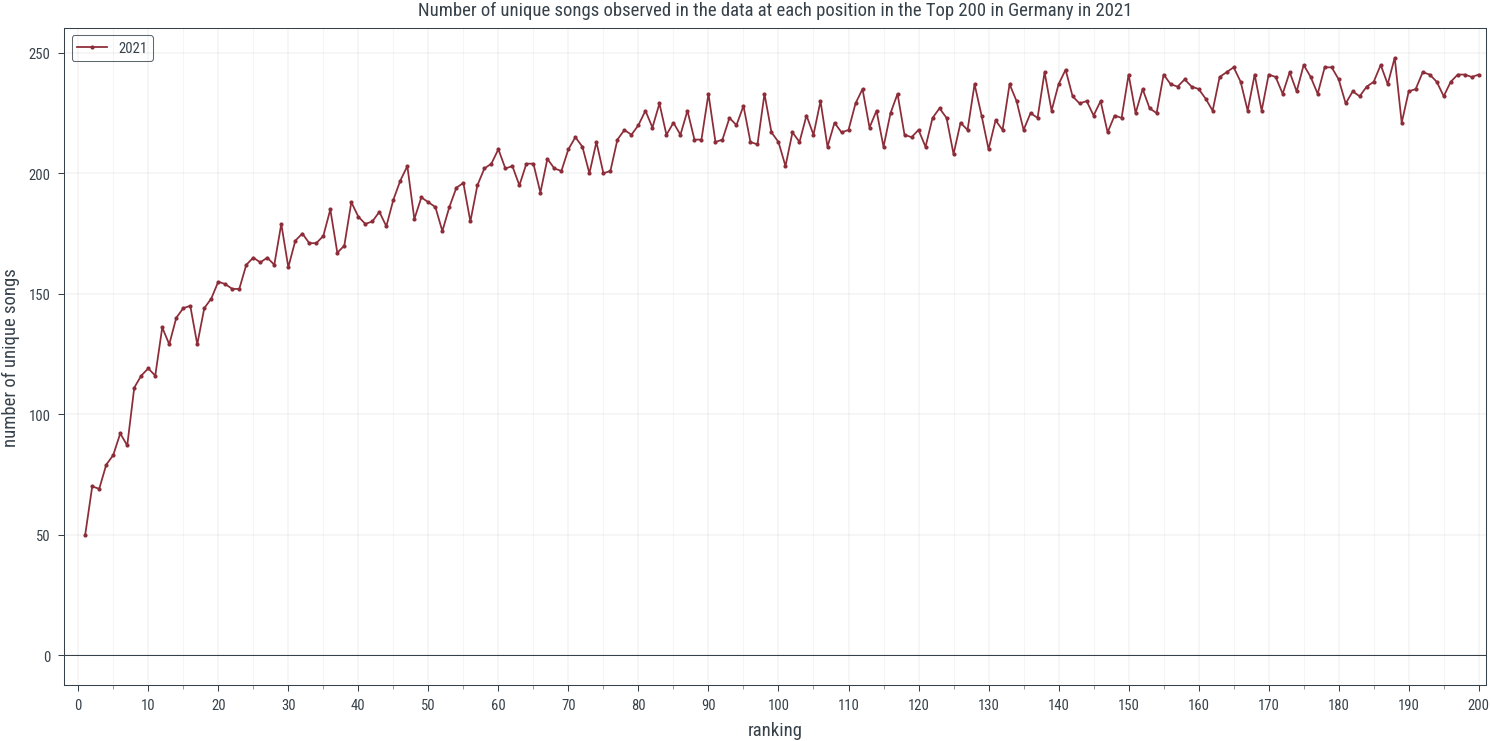

In [31]:
plot_nunique_songs_by_rank(df, "Germany", 2021)

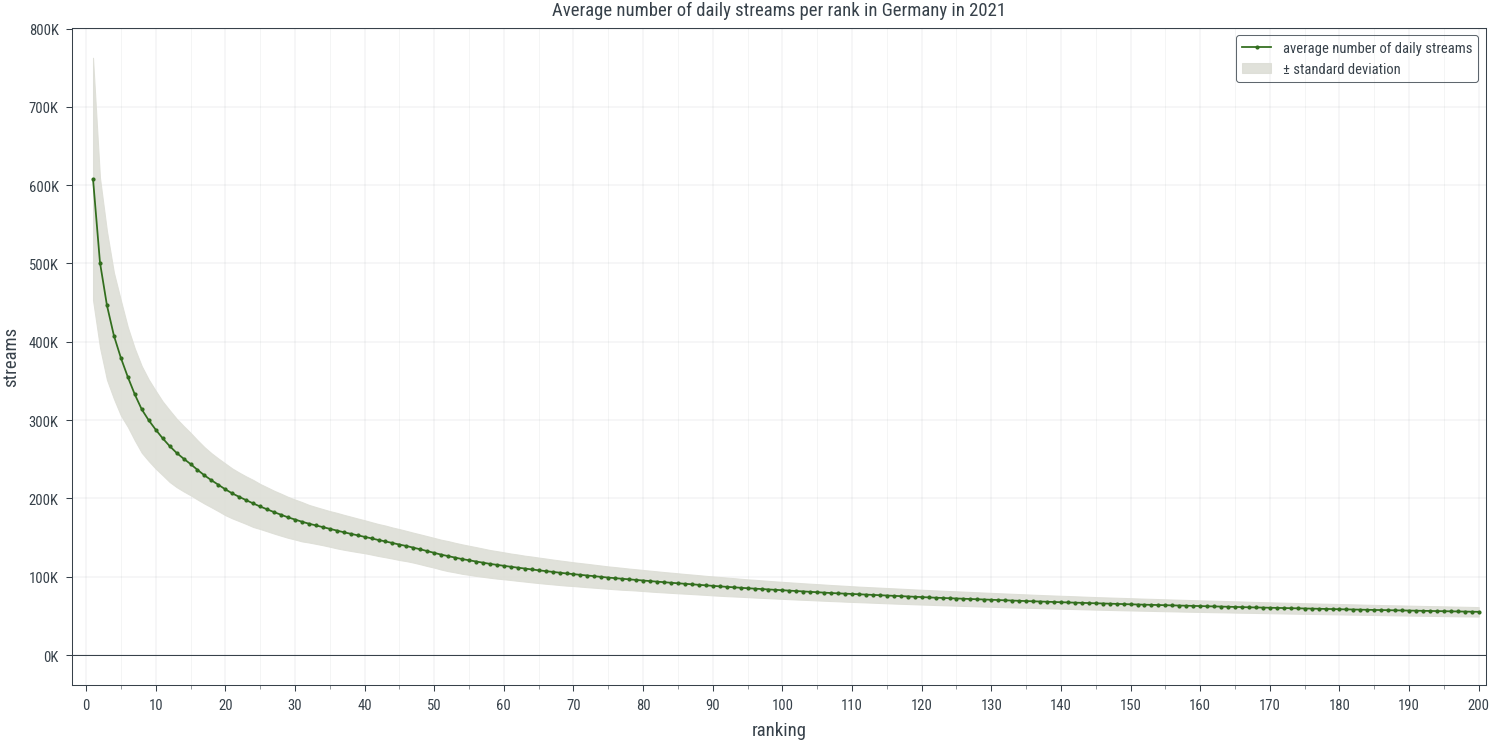

In [37]:
# for each rank, get number of streams and plot it where x axis is rank, y axis is number of streams
plot_streams_per_rank(df, "Germany", 2021)

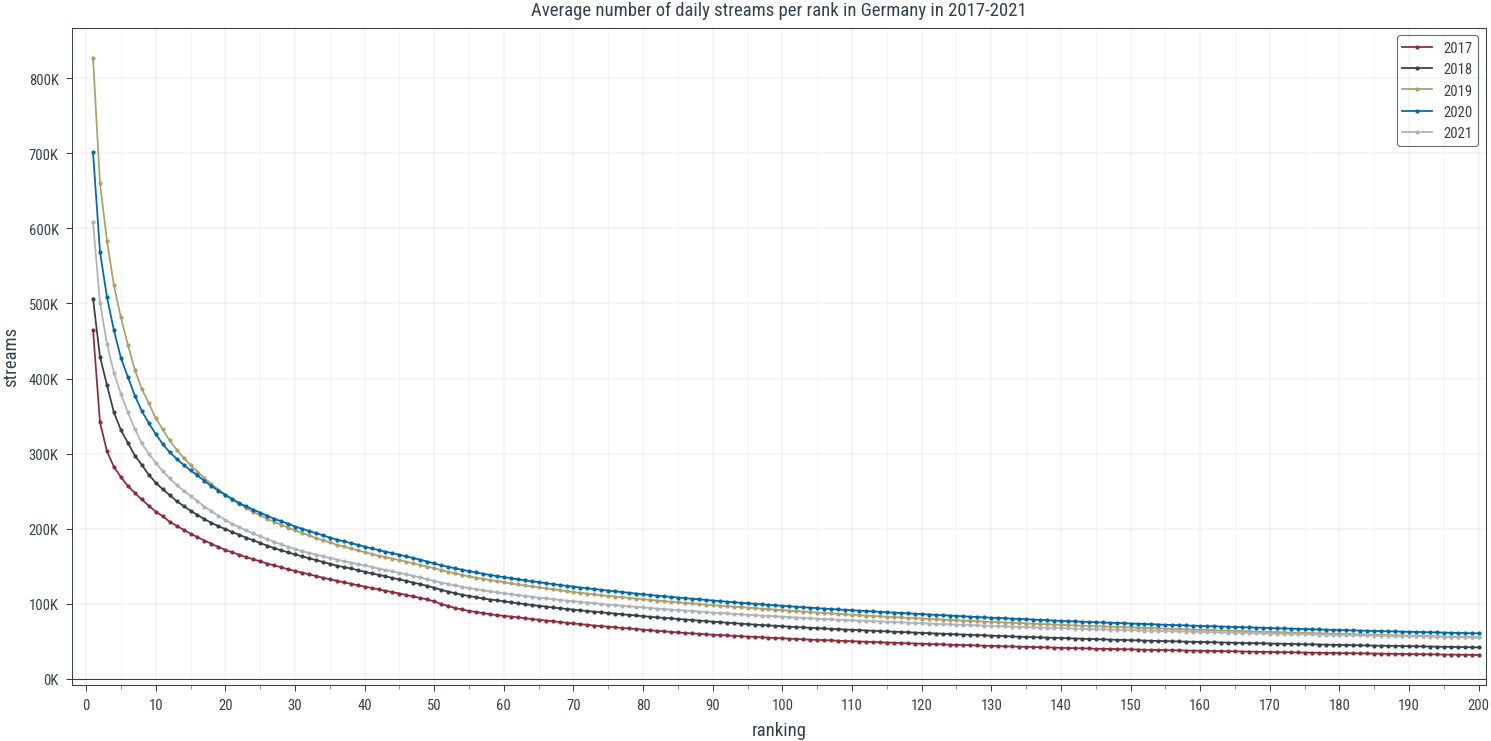

In [34]:
plot_streams_per_rank_all_years(df, "Germany")

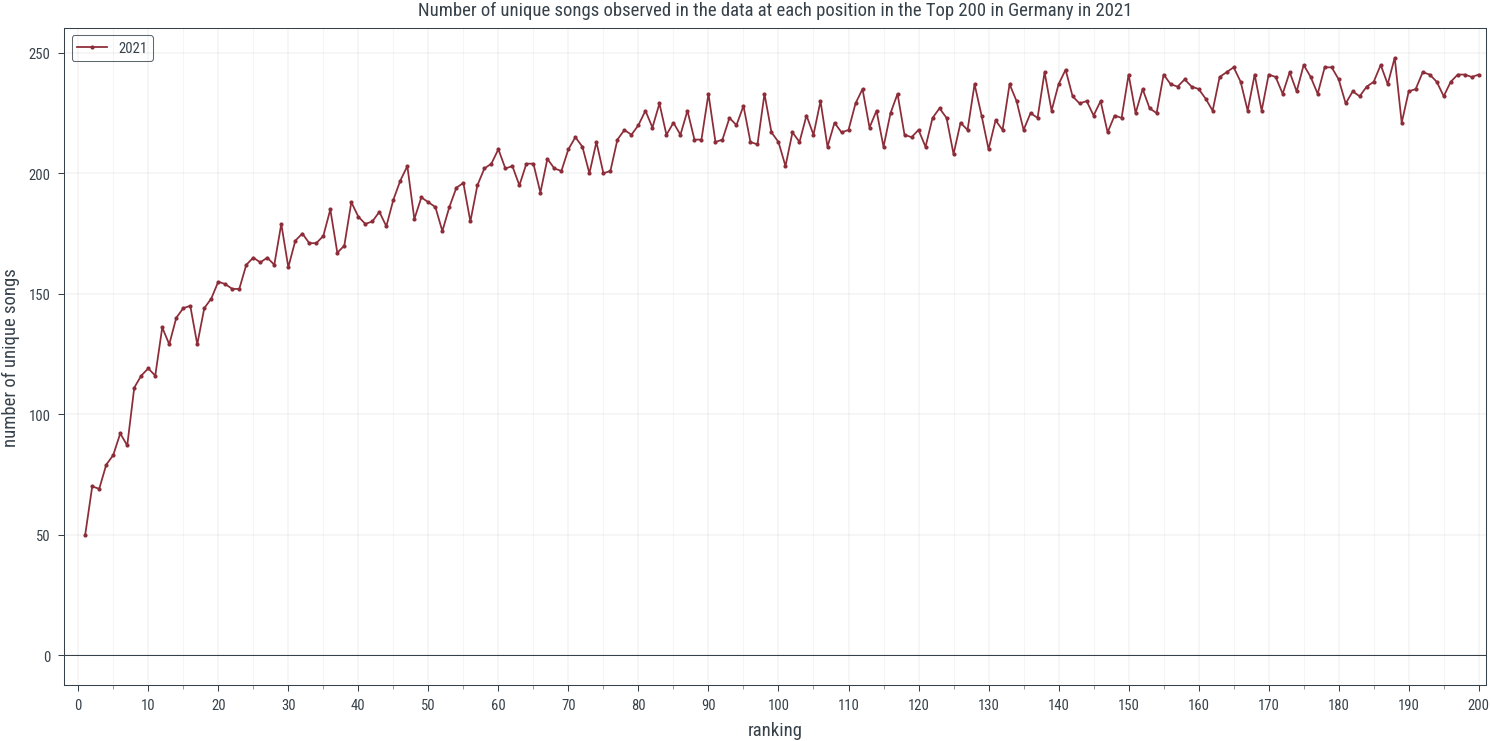

In [35]:
plot_nunique_songs_by_rank(df, "Germany", 2021)

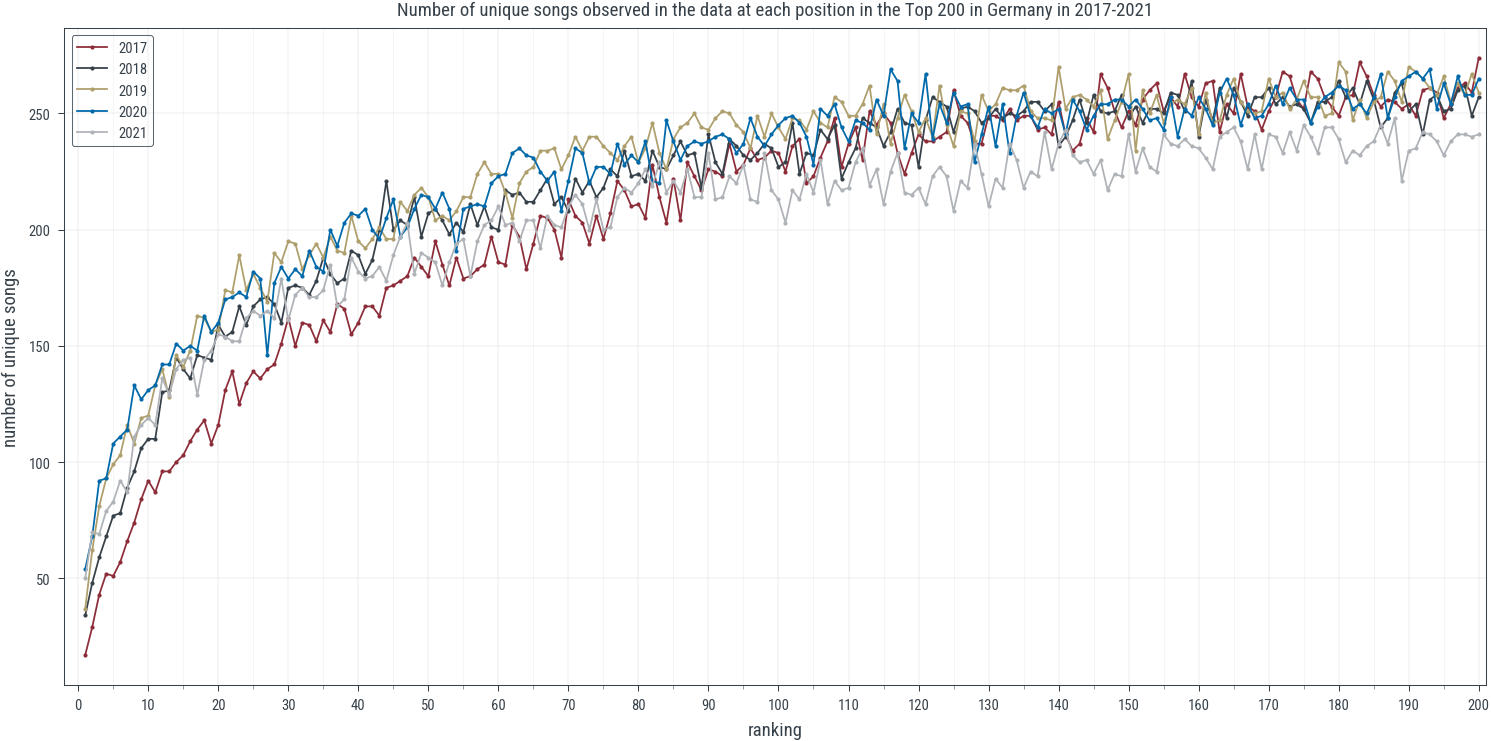

In [36]:
plot_nunique_songs_by_rank_for_all_years(df, "Germany")